# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Loading the data

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:05 (5.36 minutes after midnight),
* the third call happened at about 00:07 (5.36 + 2.48 minutes),
* the fourth call happened at about 00:15, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [26]:
# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))

## Task 1: Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day. The numbers are shown in the output above. You should find an appropriate way to visualize it.

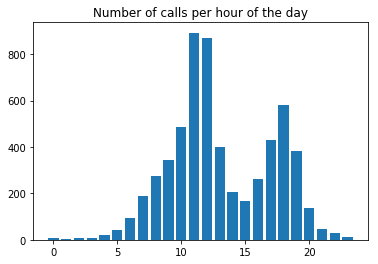

In [27]:
# Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

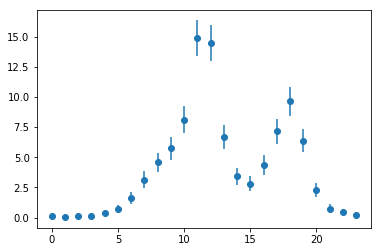

In [57]:
yerr = 0.05*np.sqrt([len(w) for w in waiting_times_per_hour])

plt.errorbar(np.arange(24), np.array([len(w) for w in waiting_times_per_hour])/60, yerr=yerr, fmt='o')
plt.show()

## Task 2: Plot a histogram of the durations for one hour
Take the data for the 11th hour (so between 11am and 12pm) and plot a histogram showing the distribution over waiting times between calls during that hour.

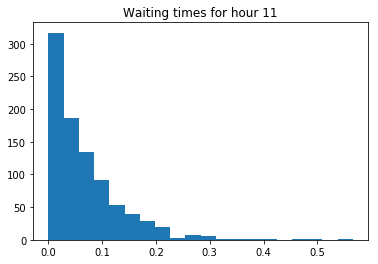

In [29]:
# Plot histogram of waiting times for hour
plt.hist(waiting_times_per_hour[11], bins=20)
plt.title('Waiting times for hour %i' % 11)
plt.show()

## Task 3: Guess the distribution
What type of distribution best represents the data in your histogram?

* Identify a type of distribution - Exponential
* Guess what the parameters of the distribution are.
* Plot the pdf of your best guess on top of your histogram, to see if they match.
* Important: you have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument `density=True` in the `hist` function.

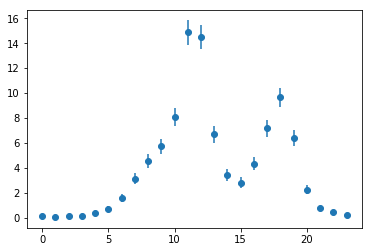

In [55]:
alpha_prior, beta_prior = 1, 0.25

errors = []

for x in waiting_times_per_hour:
    alpha_posterior, beta_posterior = alpha_prior + len(x), beta_prior + sum(x)
    posterior = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)
    errors.append((posterior.ppf(0.975) - posterior.ppf(0.025))/2)

plt.errorbar(np.arange(24), 
             np.array([len(w) for w in waiting_times_per_hour])/60, 
             yerr=errors, fmt='o')
plt.show()

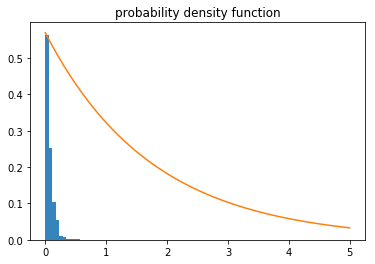

In [15]:
from scipy.stats import expon

x = []
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    if hour == 11: x = waiting_times_hour


weights = np.ones_like(x)/float(len(x))
plt.hist(x, weights = weights, alpha = 0.9)

lambda1 = 0.57
distribution = stats.expon(scale=1/lambda1)

# plt.figure(figsize=(8, 4))
x = np.linspace(0, 5)
plt.plot(x, distribution.pdf(x))
plt.title('probability density function')

plt.show()



In [ ]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np



lambda1 = 0.6
distribution = ss.expon(scale=1/lambda1)

plt.figure(figsize=(8, 4))
x = np.linspace(0, 5)
plt.plot(x, distribution.pdf(x))
plt.title('probability density function')




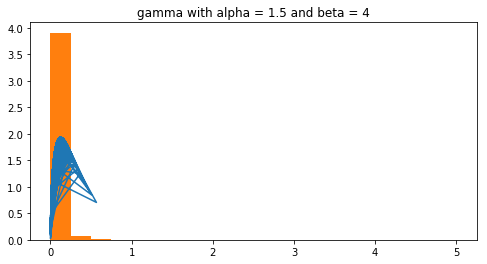

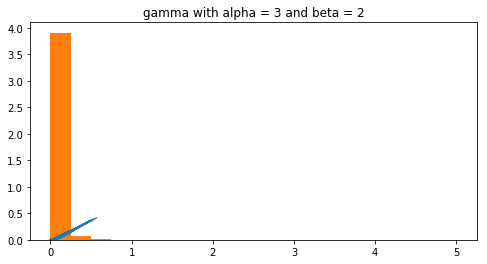

In [17]:
gamma_param = [(1.5,4),(3,2)]

x = []
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    if hour == 11: x = waiting_times_hour


for alpha, beta in gamma_param:
    gamma = stats.gamma(a=alpha, scale=1/beta)
    plt.figure(figsize=(8, 4))
    y = np.linspace(0, 5, 100)
    plt.plot(x, gamma.pdf(x))
    gamma_samples = x
    plt.hist(gamma_samples, range=[0, 5],density=True, bins=20)
    plt.title('gamma with alpha = {} and beta = {}'.format(alpha,beta))
    plt.show()


In [ ]:
import scipy.stats as ss

def plot_exponential(x_range, mu=0, sigma=1, **kwargs):

    x = x_range
    y = ss.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    x = []
    for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
        if hour == 11: x = waiting_times_hour


    plt.hist(x, alpha = 0.9)
    

plot_exponential(np.linspace(0, 1, 500000), 0, 0.002, color='red', lw=2, ls='-', alpha=30, label='pdf')


stats.expon(scale=1/lambda_)

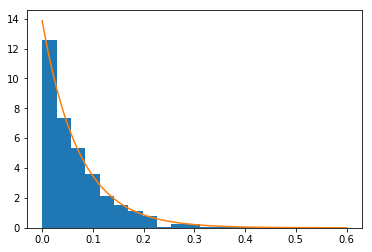

In [21]:
plt.hist(waiting_times_per_hour[11], bins=20, density=True) 
dist = stats.expon(loc=0, scale=1/13.86)
x = np.linspace(0, 0.6, 100)
plt.plot(x, dist.pdf(x))
plt.show()

([array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 0., 1., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 2., 0., 0., 0., 0., 0.]),
  array([1., 0., 1., 0., 0., 1., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([5., 5., 2., 3., 3., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([22.,  8.,  6.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([75., 15.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([183.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   

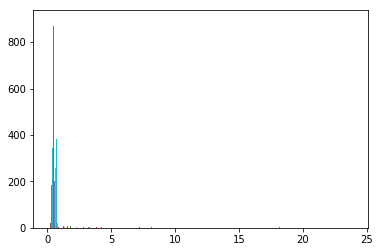

In [24]:
plt.hist(waiting_times_per_hour, bins=range(0, 25))

Answer the following questions using Python.
- Generate 1000 samples from a normal distribution with mean 100 and standard deviation 10. How many of the numbers are at least 2 standard deviations away from the mean? How many to you expect to be at least 2 standard deviations away from the mean?

In [ ]:
import scipy.stats as ss

In [ ]:
print("Question 1.1 expected: 50, actual: ", sum(np.random.normal(100, 10, 1000) > 120) + sum(np.random.normal(100, 10, 1000) < 80))
print("Question 1.2 expected: 25, actual: ", np.random.binomial(50, 0.5))
print("Question 1.3 expected: 167, actual: ", sum(np.random.randint(1,7, 1000) == 6))
print("Question 1.4 expected: ", ss.norm.cdf(2))

- Toss a fair coin 50 times. How many heads do you have? How many heads to you expect to have?
- Roll a 6­sided die 1000 times. How many 6s did you get? How many 6s do you expect to get?
- How much area (probability) is to the right of 1.5 for a normal distribution with mean 0 and standard deviation 2?